## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
## 超參數設定
# LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
lr = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUMS = [0.95, 0.6]

In [15]:
results = {}
for MOMENTUM in MOMENTUMS:
    for use_nesterov in [1, 0]:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %.2f and nesterov = %d" % (MOMENTUM, use_nesterov))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=use_nesterov, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-mv-%s-nesterov_%s" % (str(MOMENTUM), str(use_nesterov))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.95 and nesterov = 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.8906 - acc: 0.3135 - val_loss: 1.7638 - val_acc: 0.3593
Epoch 2/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6725 - acc: 0.4053 - val_loss: 1.6015 - val_acc: 0.4313
Epoch 3/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5925 - acc: 0.4319 - val_loss: 1.5419 - val_acc: 0.4519
Epoch 4/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5247 - acc: 0.4544 - val_loss: 1.5231 - val_acc: 0.4524
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4819 - acc: 0.4717 - val_loss: 1.4686 - val_acc: 0.4846
Epoch 6/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4439 - acc: 0.4826 - val_loss: 1.4544 - val_acc: 0.4853
Epoch 7/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.4225 - acc: 0.4913 - val_loss: 1.4634 - 

Epoch 2/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.7862 - acc: 0.3691 - val_loss: 1.8360 - val_acc: 0.3351
Epoch 3/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7105 - acc: 0.3957 - val_loss: 1.8066 - val_acc: 0.3537
Epoch 4/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6577 - acc: 0.4134 - val_loss: 1.6924 - val_acc: 0.3918
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6117 - acc: 0.4305 - val_loss: 1.8354 - val_acc: 0.3395
Epoch 6/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5778 - acc: 0.4448 - val_loss: 1.5934 - val_acc: 0.4364
Epoch 7/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5466 - acc: 0.4542 - val_loss: 1.5457 - val_acc: 0.4476
Epoch 8/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.5168 - acc: 0.4638 - val_loss: 1.5672 - val_acc: 0.4394
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 144us/step - loss: 1.7079 - acc: 0.3970 - val_loss: 1.7109 - val_acc: 0.3919
Epoch 4/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6493 - acc: 0.4189 - val_loss: 1.7004 - val_acc: 0.3853
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6001 - acc: 0.4356 - val_loss: 1.6088 - val_acc: 0.4232
Epoch 6/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5634 - acc: 0.4501 - val_loss: 1.6155 - val_acc: 0.4310
Epoch 7/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.5332 - acc: 0.4593 - val_loss: 1.5697 - val_acc: 0.4373
Epoch 8/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5034 - acc: 0.4702 - val_loss: 1.5738 - val_acc: 0.4372
Epoch 9/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4827 - acc: 0.4747 - val_loss: 1.4801 - val_acc: 0.4719
Epoch 10/50
50000/50000 [====================

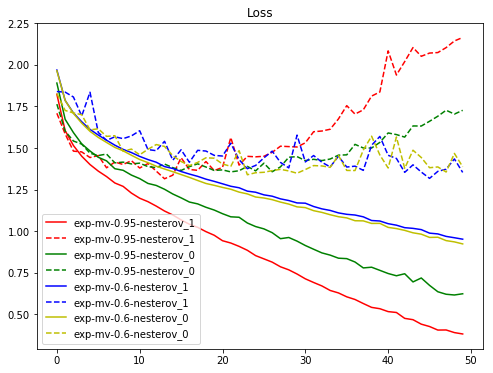

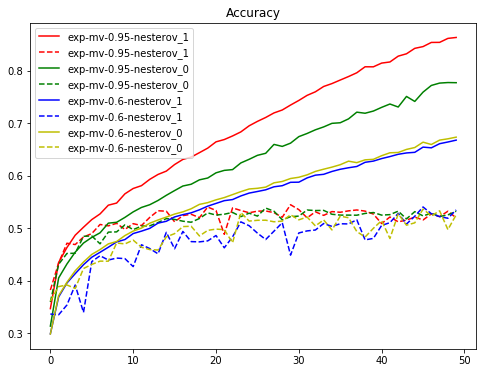

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc= 'best')
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc= 'best')
plt.show()